## Multiple Linear Regression

### Objectives

* use scikit-learn to implement Multiple Regression
* Create a model, train it, test it and use the model

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [8]:
df= pd.read_csv("/Users/balance/Desktop/IBM PYTHON/Original MY2000-2014 Fuel Consumption Ratings (2-cycle).csv",encoding='latin-1')

In [9]:
df.shape

(14275, 221)

In [10]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

MODEL - 0%
MAKE - 0%
MODEL.1 - 0%
VEHICLE CLASS - 0%
ENGINE SIZE - 0%
CYLINDERS - 0%
TRANSMISSION - 0%
FUEL - 0%
FUEL CONSUMPTION - 0%
Unnamed: 9 - 0%
Unnamed: 10 - 0%
Unnamed: 11 - 0%
CO2 EMISSIONS  - 0%
Unnamed: 13 - 100%
Unnamed: 14 - 100%
Unnamed: 15 - 100%
Unnamed: 16 - 100%
Unnamed: 17 - 100%
Unnamed: 18 - 100%
Unnamed: 19 - 100%
Unnamed: 20 - 100%
Unnamed: 21 - 100%
Unnamed: 22 - 100%
Unnamed: 23 - 100%
Unnamed: 24 - 100%
Unnamed: 25 - 100%
Unnamed: 26 - 100%
Unnamed: 27 - 100%
Unnamed: 28 - 100%
Unnamed: 29 - 100%
Unnamed: 30 - 100%
Unnamed: 31 - 100%
Unnamed: 32 - 100%
Unnamed: 33 - 100%
Unnamed: 34 - 100%
Unnamed: 35 - 100%
Unnamed: 36 - 100%
Unnamed: 37 - 100%
Unnamed: 38 - 100%
Unnamed: 39 - 100%
Unnamed: 40 - 100%
Unnamed: 41 - 100%
Unnamed: 42 - 100%
Unnamed: 43 - 100%
Unnamed: 44 - 100%
Unnamed: 45 - 100%
Unnamed: 46 - 100%
Unnamed: 47 - 100%
Unnamed: 48 - 100%
Unnamed: 49 - 100%
Unnamed: 50 - 100%
Unnamed: 51 - 100%
Unnamed: 52 - 100%
Unnamed: 53 - 100%
Unnamed: 54 - 10

In [11]:
df.duplicated().sum()

1

In [12]:
condition=df[col].isnull()> 90%

SyntaxError: invalid syntax (<ipython-input-12-c95df54f3ba1>, line 1)

In [13]:
## remove paticular columns by certain condition

threshold = 0.9  # 90% threshold
columns_to_remove = df.columns[df.isnull().mean() > threshold]


In [14]:
df1 = df.drop(columns=columns_to_remove)

In [15]:
df1.shape

(14275, 13)

In [16]:
df1.head()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 EMISSIONS
0,YEAR,NaN,# = high output engine,NaN,(L),NaN,NaN,TYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),(g/km)
1,2000,ACURA,1.6EL,COMPACT,1.6,4.0,A4,X,9.2,6.7,8.1,35,186
2,2000,ACURA,1.6EL,COMPACT,1.6,4.0,M5,X,8.5,6.5,7.6,37,175
3,2000,ACURA,3.2TL,MID-SIZE,3.2,6.0,AS5,Z,12.2,7.4,10.0,28,230
4,2000,ACURA,3.5RL,MID-SIZE,3.5,6.0,A4,Z,13.4,9.2,11.5,25,264


In [17]:
## remove row

remove_row=[0,2]
df2=df1.drop(remove_row)

In [18]:
df2.head()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 EMISSIONS
1,2000,ACURA,1.6EL,COMPACT,1.6,4.0,A4,X,9.2,6.7,8.1,35,186
3,2000,ACURA,3.2TL,MID-SIZE,3.2,6.0,AS5,Z,12.2,7.4,10.0,28,230
4,2000,ACURA,3.5RL,MID-SIZE,3.5,6.0,A4,Z,13.4,9.2,11.5,25,264
5,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.0,7.0,8.6,33,198
6,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,9.3,6.8,8.2,34,189


In [19]:
cdf = df2[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','CO2 EMISSIONS ']]
cdf.head(9)

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,CO2 EMISSIONS
1,1.6,4.0,9.2,186
3,3.2,6.0,12.2,230
4,3.5,6.0,13.4,264
5,1.8,4.0,10.0,198
6,1.8,4.0,9.3,189
7,1.8,4.0,9.4,191
8,3.0,6.0,13.6,267
9,3.2,6.0,13.8,269
10,1.8,4.0,11.4,218


In [20]:
cdf.columns

Index(['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'CO2 EMISSIONS '], dtype='object')

In [21]:
viz = cdf[['ENGINE SIZE','CO2 EMISSIONS ','FUEL CONSUMPTION']]
viz.hist()
plt.show()

ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [ ]:
## unable to plot the columns, check data type

In [22]:
print(cdf.dtypes)

ENGINE SIZE          object
CYLINDERS           float64
FUEL CONSUMPTION     object
CO2 EMISSIONS        object
dtype: object


In [23]:
cdf['ENGINE SIZE'] = cdf['ENGINE SIZE'].astype(float)
cdf['CO2 EMISSIONS '] = cdf['CO2 EMISSIONS '].astype(float)
cdf['FUEL CONSUMPTION'] = cdf['FUEL CONSUMPTION'].astype(float)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

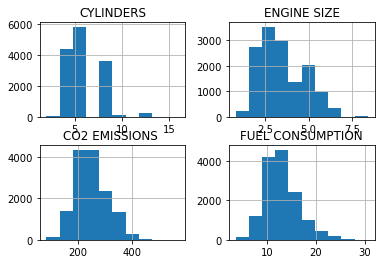

In [24]:

viz = cdf[['CYLINDERS','ENGINE SIZE','CO2 EMISSIONS ','FUEL CONSUMPTION']]
viz.hist()
plt.show()

array([[<AxesSubplot:title={'center':'CYLINDERS'}>,
        <AxesSubplot:title={'center':'ENGINE SIZE'}>],
       [<AxesSubplot:title={'center':'CO2 EMISSIONS '}>,
        <AxesSubplot:title={'center':'FUEL CONSUMPTION'}>]], dtype=object)

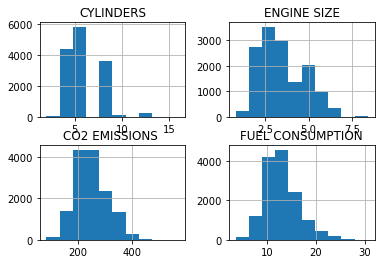

In [25]:
viz.hist()


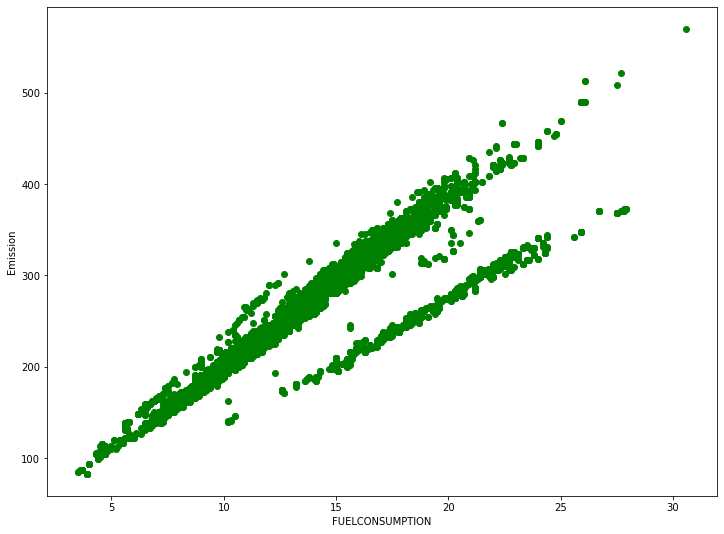

In [26]:
plt.figure(figsize=(12, 9))
plt.scatter(cdf['FUEL CONSUMPTION'], cdf['CO2 EMISSIONS '],  color='green')
plt.xlabel("FUELCONSUMPTION")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the  **np.random.rand()** function:


In [27]:
msk = np.random.rand(len(df2)) < 0.8
train = cdf[msk]
test = cdf[~msk]

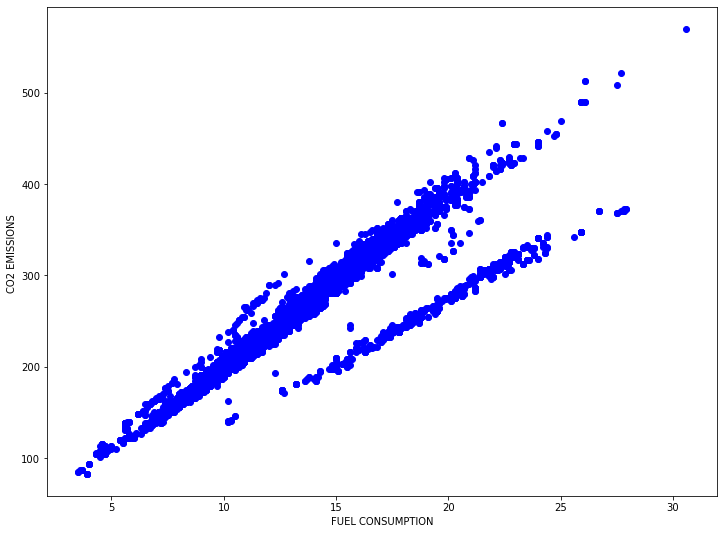

In [28]:
plt.figure(figsize=(12, 9))
plt.scatter(train['FUEL CONSUMPTION'], train['CO2 EMISSIONS '],  color='blue')
plt.xlabel("FUEL CONSUMPTION")
plt.ylabel("CO2 EMISSIONS ")
plt.show()

In [29]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUEL CONSUMPTION']])
train_y = np.asanyarray(train[['CO2 EMISSIONS ']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [30]:
print(train.isnull().sum())


ENGINE SIZE         16
CYLINDERS           16
FUEL CONSUMPTION    16
CO2 EMISSIONS       16
dtype: int64


In [31]:
train.dropna(subset=['FUEL CONSUMPTION', 'CO2 EMISSIONS '], inplace=True)


/opt/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [32]:
train['FUEL CONSUMPTION'] = train['FUEL CONSUMPTION'].astype(float)
train['CO2 EMISSIONS '] = train['CO2 EMISSIONS '].astype(float)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
train_x = np.asanyarray(train[['FUEL CONSUMPTION']])
train_y = np.asanyarray(train[['CO2 EMISSIONS ']])
regr.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[15.38323736]]
Intercept:  [49.91127435]


Text(0, 0.5, 'Emission')

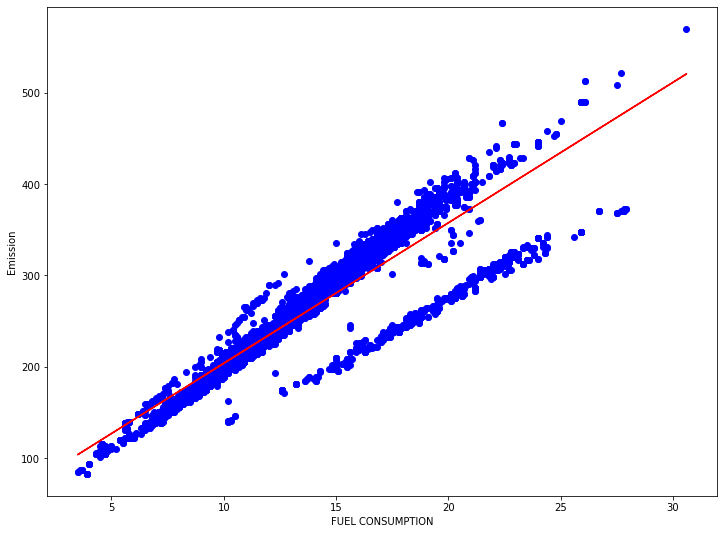

In [34]:
plt.figure(figsize=(12, 9))
plt.scatter(train['FUEL CONSUMPTION'], train['CO2 EMISSIONS '],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("FUEL CONSUMPTION")
plt.ylabel("Emission")

In [35]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['FUEL CONSUMPTION']])
test_y = np.asanyarray(test[['CO2 EMISSIONS ']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [36]:
print(test.isnull().sum())


ENGINE SIZE         5
CYLINDERS           5
FUEL CONSUMPTION    5
CO2 EMISSIONS       5
dtype: int64


In [37]:
test.dropna(subset=['FUEL CONSUMPTION'], inplace=True)


/opt/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [38]:
test['FUEL CONSUMPTION'] = test['FUEL CONSUMPTION'].astype(float)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
test_x = np.asanyarray(test[['FUEL CONSUMPTION']])
test_y = np.asanyarray(test[['CO2 EMISSIONS ']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )


Mean absolute error: 14.45
Residual sum of squares (MSE): 587.43
R2-score: 0.83


In [40]:
print(cdf.dtypes)

ENGINE SIZE         float64
CYLINDERS           float64
FUEL CONSUMPTION    float64
CO2 EMISSIONS       float64
dtype: object


### Multiple Regression Model

In reality, there are multiple variables that impact the co2emission. When more than one independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting co2emission using the features FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.


In [43]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION']])
y = np.asanyarray(train[['CO2 EMISSIONS ']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 7.24593026  2.98445184 11.99823965]]


As mentioned before, **Coefficient** and **Intercept**  are the parameters of the fitted line.
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


## Prediction

In [44]:
y_hat= regr.predict(test[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION']])
x = np.asanyarray(test[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION']])
y = np.asanyarray(test[['CO2 EMISSIONS ']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 509.15
Variance score: 0.86


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:435: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
